In [27]:
from datetime import date, timedelta
from constants import *
from phe import *
from phe import plot_cases_by_area as plot_areas, map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

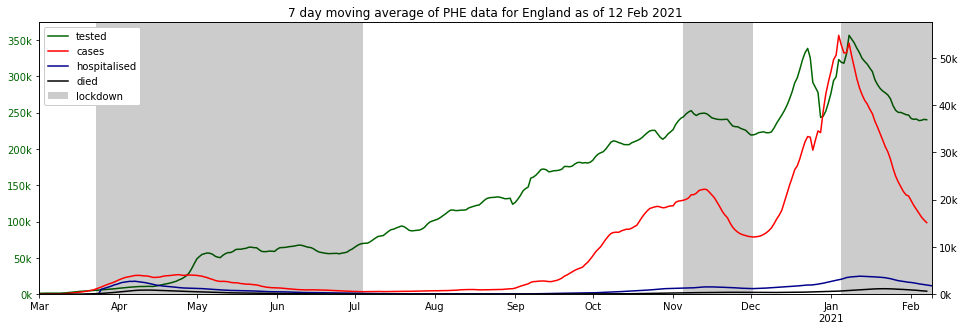

In [28]:
plot_summary(earliest_date='2020-03-01')

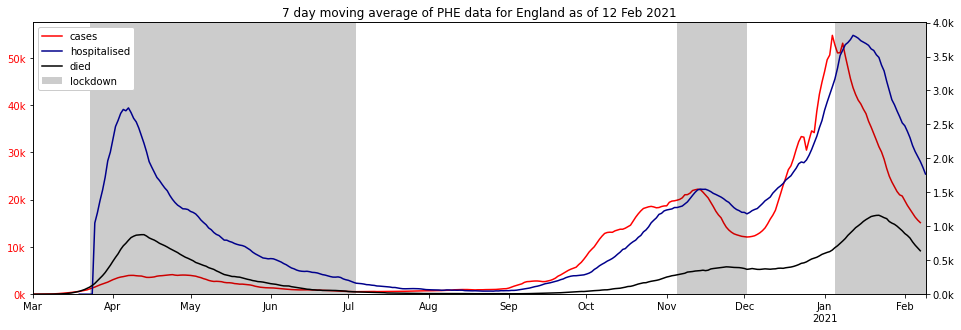

In [29]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,483966.0,11809241.0,11325275.0,56286961,0.859819,20.120601,79.019580
1,Northern Ireland,N92000002,28552.0,373414.0,344862.0,1893667,1.507762,18.211333,80.280905
2,Scotland,S92000003,13566.0,1113625.0,1100059.0,5463300,0.248311,20.135431,79.616258
3,Wales,W92000004,4010.0,715944.0,711934.0,3152879,0.127185,22.580442,77.292373


'partial: 14,012,224'

'full: 530,094'

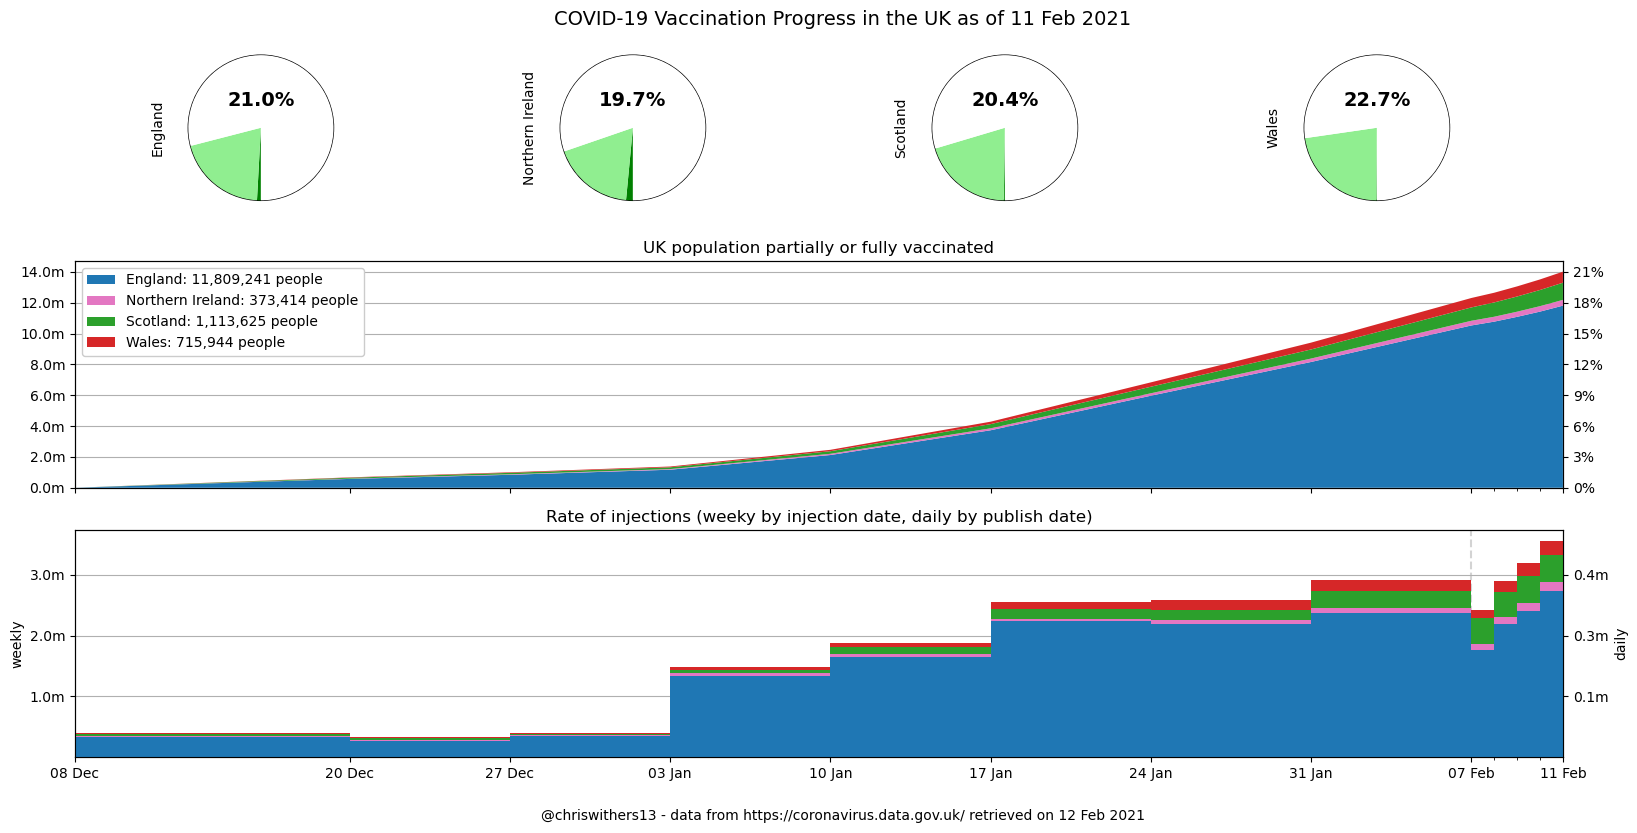

In [30]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [32]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,11 Feb 21,"+386,734","+4,646","+4,646","+11,809,241","+483,966","+483,966"
Northern Ireland,11 Feb 21,"+19,657",+415,+415,"+373,414","+28,552","+28,552"
Scotland,11 Feb 21,"+64,878",+371,+371,"+1,113,625","+13,566","+13,566"
Wales,11 Feb 21,"+31,847",+215,+215,"+715,944","+4,010","+4,010"


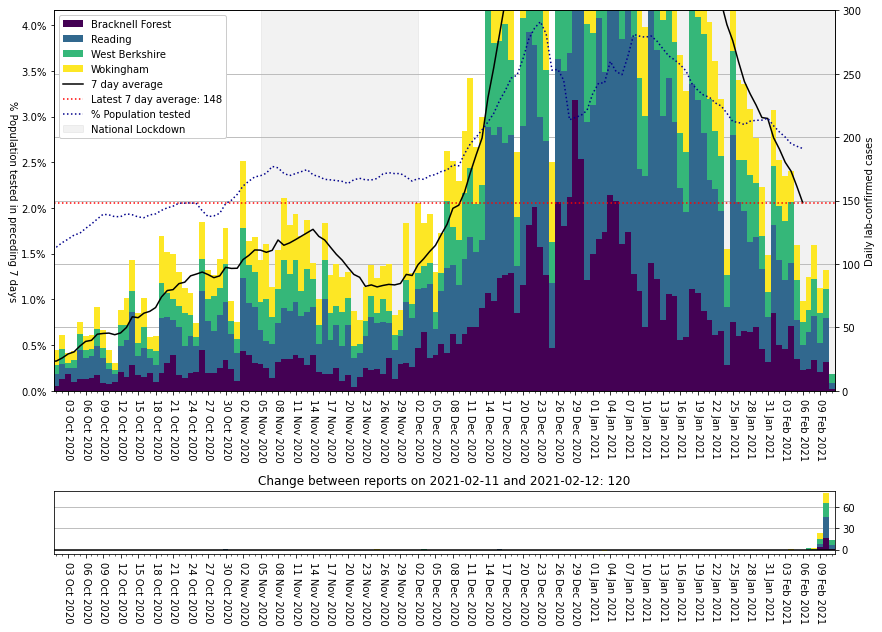

In [33]:
plot_areas(for_date, areas=my_areas, ylim=300)

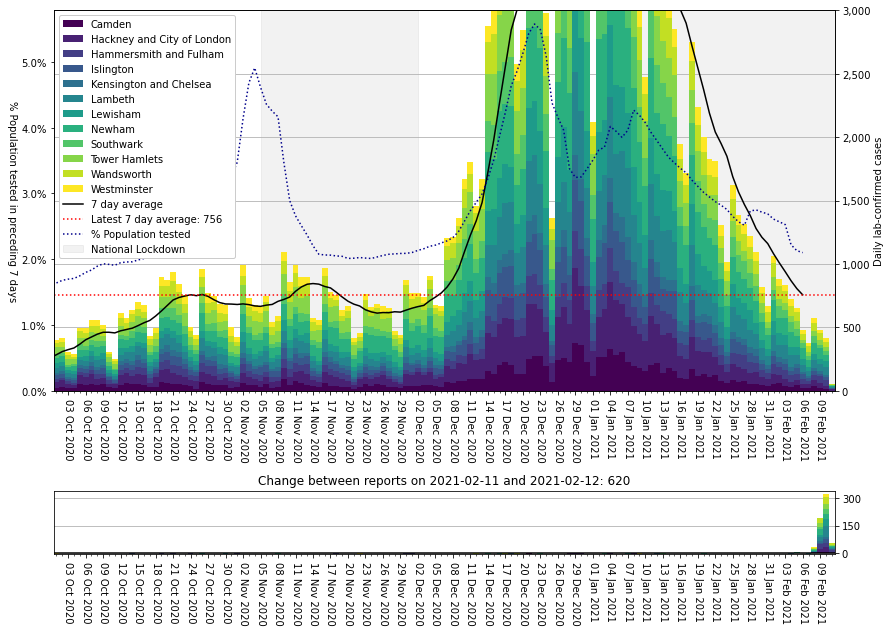

In [34]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [35]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [36]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,314.326068,227.0,2021-02-11
E06000002,Middlesbrough,267.413818,377.0,2021-02-11
E08000028,Sandwell,266.098341,874.0,2021-02-11
E07000170,Ashfield,257.977767,330.0,2021-02-11
E08000030,Walsall,255.361184,729.0,2021-02-11
E06000032,Luton,245.479977,523.0,2021-02-11
E08000011,Knowsley,245.257255,370.0,2021-02-11
E08000013,St. Helens,240.330038,434.0,2021-02-11
S12000008,East Ayrshire,236.865831,289.0,2021-02-11


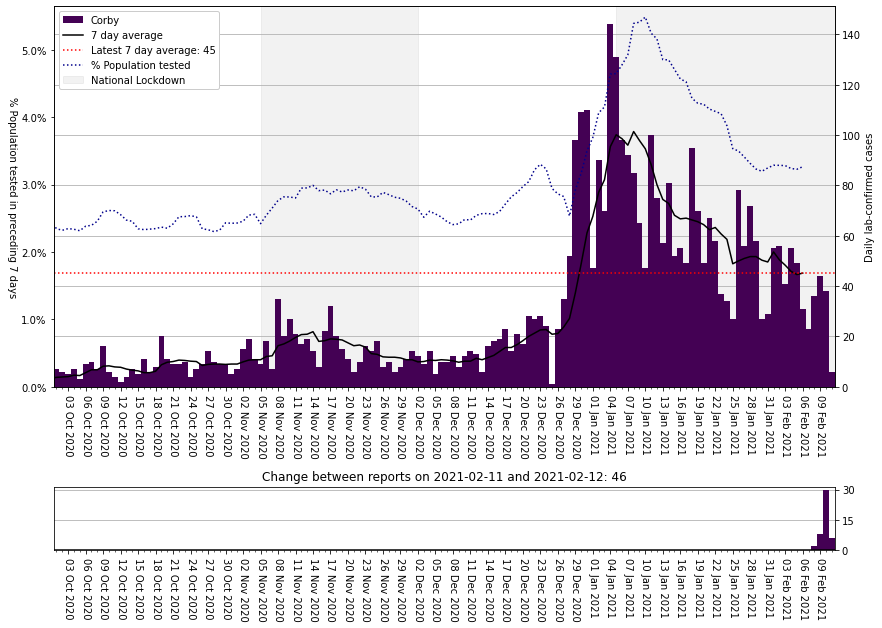

In [37]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [38]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,198.718533,2269.0,2021-02-11
E08000035,Leeds,146.884720,1165.0,2021-02-11
E08000032,Bradford,183.224152,989.0,2021-02-11
E08000012,Liverpool,188.939889,941.0,2021-02-11
E08000028,Sandwell,266.098341,874.0,2021-02-11
E08000003,Manchester,156.821462,867.0,2021-02-11
S12000049,Glasgow City,127.148092,805.0,2021-02-11
E06000047,County Durham,149.596109,793.0,2021-02-11
E06000016,Leicester,217.094268,769.0,2021-02-11


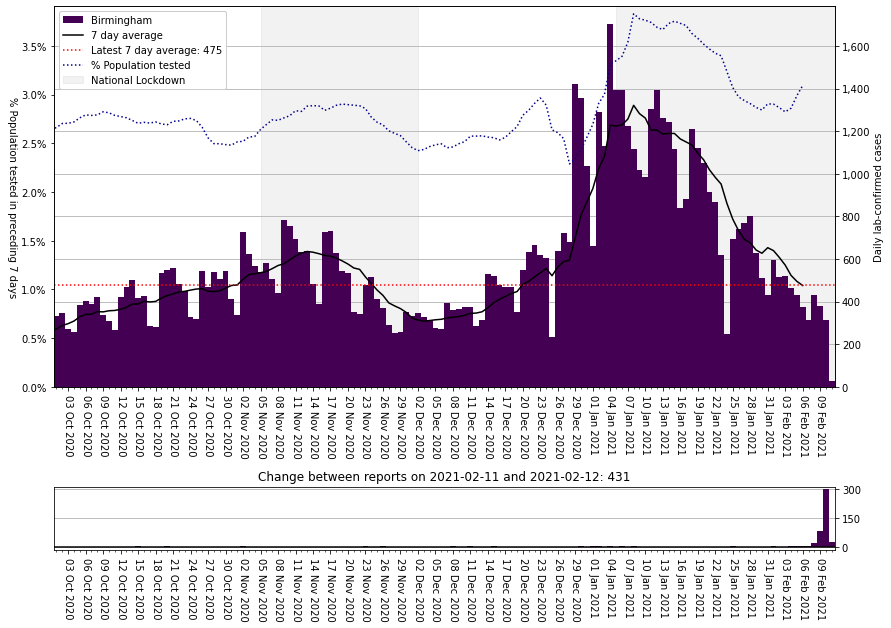

In [39]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [40]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)

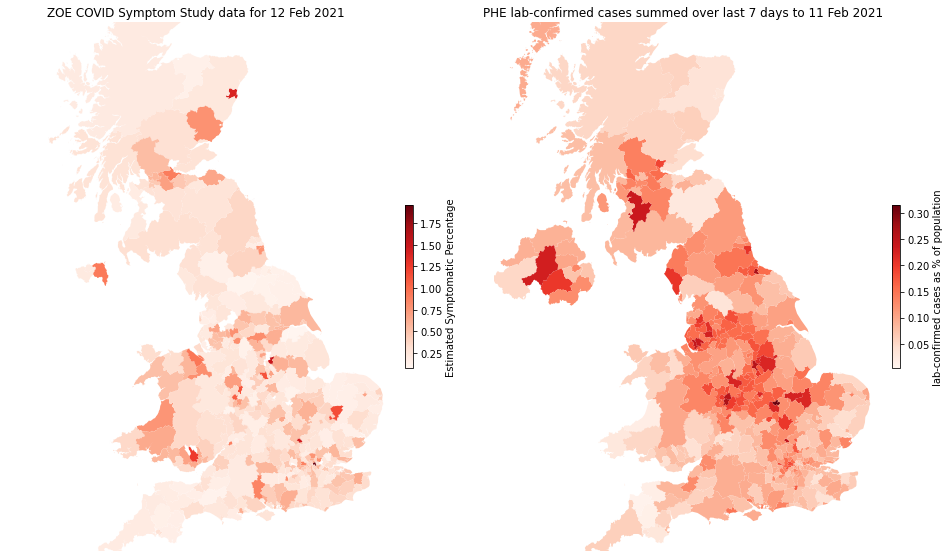

In [41]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)   

In [42]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)

Loading BokehJS ...

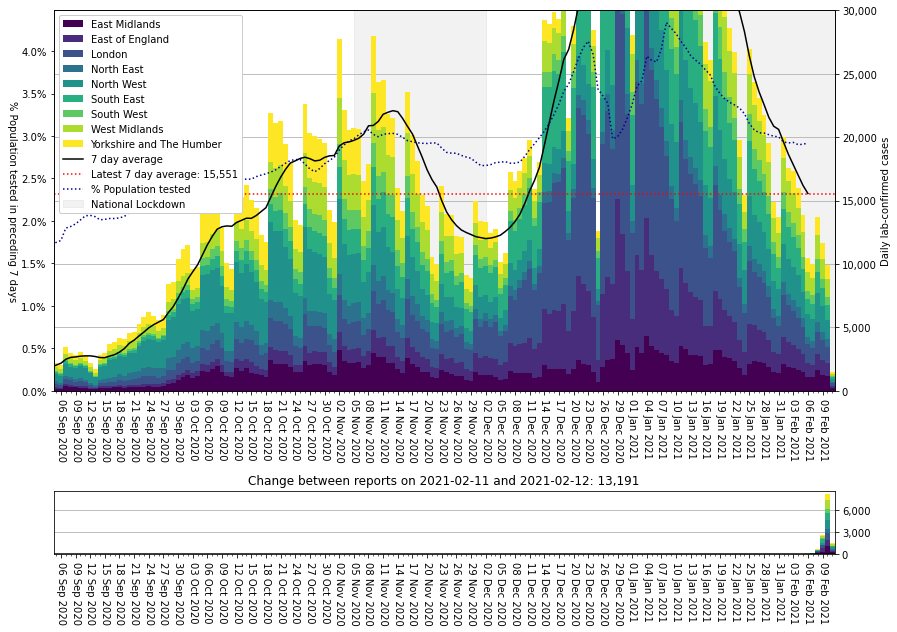

In [43]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

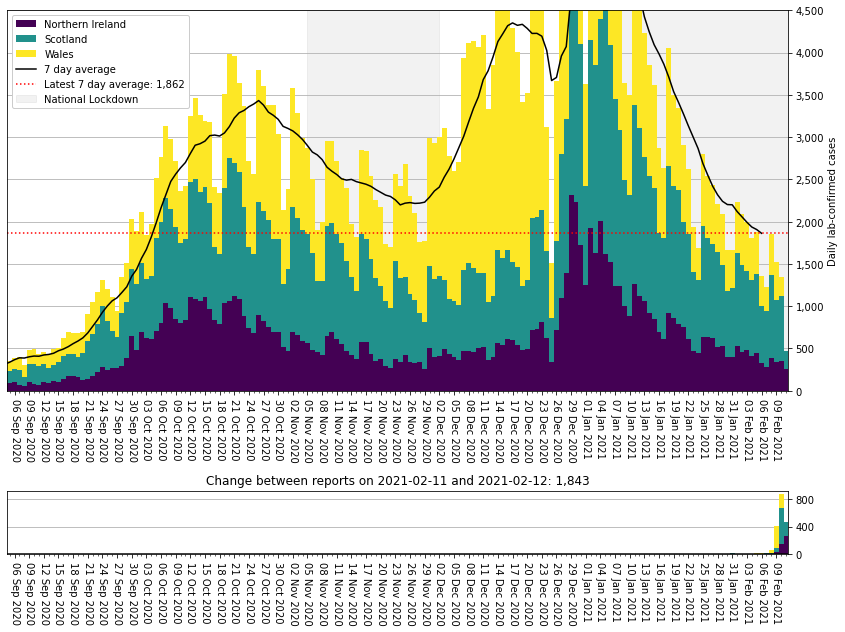

In [44]:
plot_areas(for_date, area_type=nation, areas=[scotland, northern_ireland, wales], show_testing=False, ylim=4_500, earliest='2020-09-05')